In [96]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [97]:
# load dataset
customer_churn_df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [98]:
customer_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [99]:
# shape of the dataset
customer_churn_df.shape

(7043, 21)

In [100]:
customer_churn_df = customer_churn_df.drop('customerID', axis=1)
customer_churn_df.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1473,Female,0,No,No,24,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.75,2407.3,Yes
726,Female,0,No,No,22,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.25,605.9,No


In [101]:
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [102]:
customer_churn_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values are available in customer_churn_df

In [103]:
customer_churn_df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [104]:
pd.to_numeric(customer_churn_df['TotalCharges'], errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [105]:
customer_churn_df[pd.to_numeric(customer_churn_df['TotalCharges'], errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [106]:
len(customer_churn_df[pd.to_numeric(customer_churn_df['TotalCharges'], errors='coerce').isnull()])

11

In [107]:
customer_churn_df['TotalCharges'].iloc[753]

' '

In [108]:
# replace space(' ') to no space('')
customer_churn_df['TotalCharges'].replace(' ', '', inplace=True)

In [109]:
customer_churn_df['TotalCharges'] = pd.to_numeric(customer_churn_df['TotalCharges'])

In [110]:
customer_churn_df['TotalCharges'].values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [111]:
customer_churn_df['TotalCharges'].isnull().sum()

11

11 null values are availabe 

In [112]:
# creating median value for totalcharges column
customer_churn_df['TotalCharges'].median()

1397.475

In [113]:
# filling null values with median values
customer_churn_df['TotalCharges'] = customer_churn_df['TotalCharges'].fillna(customer_churn_df['TotalCharges'].median())

In [114]:
customer_churn_df['TotalCharges'].isnull().sum()

0

all null values are clear

In [115]:
customer_churn_df['TotalCharges'].dtype 

dtype('float64')

In [116]:
customer_churn_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [117]:
customer_churn_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [118]:
customer_churn_df[customer_churn_df['Churn'] == 'No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5174, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


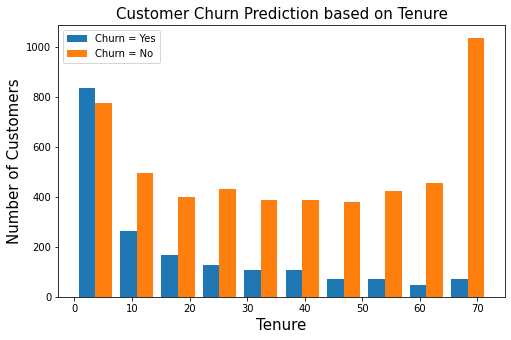

In [119]:
tenure_churn_yes = customer_churn_df[customer_churn_df['Churn'] == 'Yes'].tenure
tenure_churn_no = customer_churn_df[customer_churn_df['Churn'] == 'No'].tenure

plt.figure(figsize= (8,5))
plt.xlabel('Tenure', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.title('Customer Churn Prediction based on Tenure', fontsize=15)

plt.hist([tenure_churn_yes, tenure_churn_no], label=['Churn = Yes', 'Churn = No'])
plt.legend()

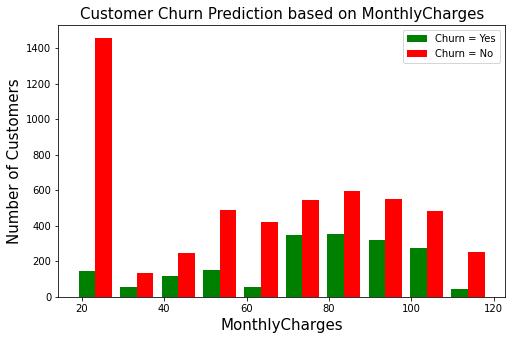

In [120]:
monthlyCharges_churn_yes = customer_churn_df[customer_churn_df['Churn'] == 'Yes'].MonthlyCharges
monthlyCharges_churn_no = customer_churn_df[customer_churn_df['Churn'] == 'No'].MonthlyCharges

plt.figure(figsize= (8,5))
plt.xlabel('MonthlyCharges', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.title('Customer Churn Prediction based on MonthlyCharges', fontsize=15)

plt.hist([monthlyCharges_churn_yes, monthlyCharges_churn_no], color=['green', 'red'], label=['Churn = Yes', 'Churn = No'])
plt.legend()

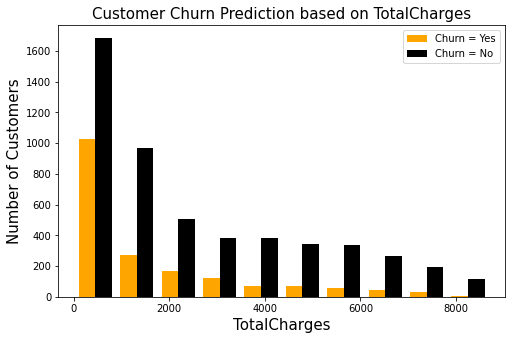

In [121]:
totalCharges_churn_yes = customer_churn_df[customer_churn_df['Churn'] == 'Yes'].TotalCharges
totalCharges_churn_no = customer_churn_df[customer_churn_df['Churn'] == 'No'].TotalCharges

plt.figure(figsize= (8,5))
plt.xlabel('TotalCharges', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.title('Customer Churn Prediction based on TotalCharges', fontsize=15)

plt.hist([totalCharges_churn_yes, totalCharges_churn_no], color=['orange', 'black'], label=['Churn = Yes', 'Churn = No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


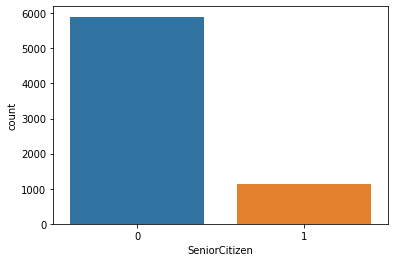

In [122]:
sns.countplot(customer_churn_df['SeniorCitizen'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


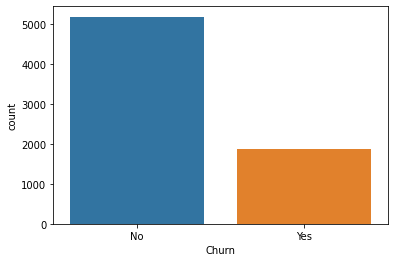

In [123]:
sns.countplot(customer_churn_df['Churn'])

In [124]:
def unique_column_value(df):
  for column in customer_churn_df:
    if customer_churn_df[column].dtype == 'object':
      print(f'{column} : {customer_churn_df[column].unique()}')

In [125]:
unique_column_value(customer_churn_df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [126]:
customer_churn_df.replace('No phone service', 'No', inplace=True)
customer_churn_df.replace('No internet service', 'No', inplace=True)

In [127]:
unique_column_value(customer_churn_df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [128]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [129]:
for col in yes_no_columns:
  customer_churn_df[col].replace({'Yes':1, 'No':0}, inplace=True)

In [130]:
for col in customer_churn_df:
  print(f'{col}: {customer_churn_df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [131]:
customer_churn_df['gender'].replace({'Male':1, 'Female':0}, inplace=True)

In [132]:
pd.get_dummies(data=customer_churn_df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,0,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,1,0,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,1,0,0,0,0,0,1


In [133]:
customer_churn_df = pd.get_dummies(data=customer_churn_df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
customer_churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,0,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,1,0,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,1,0,0,0,0,0,1


In [134]:
customer_churn_df.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                uint8
InternetService_No                         uint8
Contract_One year                          uint8
Contract_Two year   

In [135]:
scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_churn_df[scale] = scaler.fit_transform(customer_churn_df[scale])

In [136]:
for col in customer_churn_df:
  print(f'{col}: {customer_churn_df[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [-1.27744458  0.06632742 -1.23672422  0.51425142 -0.99240204 -0.42231695
 -0.91096131 -0.17799476  1.2064976  -0.78880022 -0.66663913  1.04361615
  0.67713287 -0.30015585  1.49154015  0.79929397  1.57298088 -0.46303731
 -0.82952058 -0.09655404  0.59569215  1.61370124 -0.62591876 -0.21871513
 -1.11456313  0.55497178 -0.87024095  1.53226051  1.24721797  0.43281069
 -0.70735949  1.12505688 -0.5851984   1.36937906 -0.95168167 -1.19600386
 -0.05583367  0.71785324  1.28793833  0.96217542 -1.0331224   0.39209033
  0.10704778  0.63641251 -0.1372744   1.32865869  0.22920887  1.45081979
 -0.01511331  0.92145506  0.18848851  0.14776815  0.35136997 -1.07384277
 -1.15528349  0.02560706  1.41009942 -0.38159658  1.00289578  1.16577724
 -0.74807986 -0.50375767  0.84001433  0.3106496   1.08433651 -0.34087622
  0.47353106 -0.54447804  0.88073469  0.7585736  -0.25943549 -1.31816495
  0.26992924]
PhoneService: [0 1]
MultipleLines:

Train test split

In [42]:
X = customer_churn_df.drop('Churn', axis=1)
y = customer_churn_df['Churn']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [44]:
X.shape, X_train.shape, X_test.shape

((7043, 23), (5634, 23), (1409, 23))

# ANN Model 

In [45]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.5 kB/s 
     |████████████████████████████████| 438 kB 67.9 MB/s 
     |████████████████████████████████| 1.6 MB 50.1 MB/s 
     |████████████████████████████████| 5.8 MB 57.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [46]:
import tensorflow as tf
from tensorflow import keras

In [47]:
model = keras.Sequential([
    keras.layers.Dense(23, input_shape=(23,), activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(12, activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
141/141 [==============================] - 3s 5ms/step - loss: 0.5066 - accuracy: 0.7273 - val_loss: 0.4319 - val_accuracy: 0.7968
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4330 - accuracy: 0.7943 - val_loss: 0.4233 - val_accuracy: 0.8030
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4275 - accuracy: 0.7957 - val_loss: 0.4197 - val_accuracy: 0.8083
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4236 - accuracy: 0.7968 - val_loss: 0.4175 - val_accuracy: 0.8119
Epoch 5/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4211 - accuracy: 0.7968 - val_loss: 0.4164 - val_accuracy: 0.8048
Epoch 6/100
141/141 [==============================] - 1s 6ms/step - loss: 0.4194 - accuracy: 0.7999 - val_loss: 0.4151 - val_accuracy: 0.7995
Epoch 7/100
141/141 [==============================] - 1s 6ms/step - loss: 0.4185 - accuracy: 0.7965 - val_loss: 0.4144 - val_accuracy: 0.8004

In [48]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

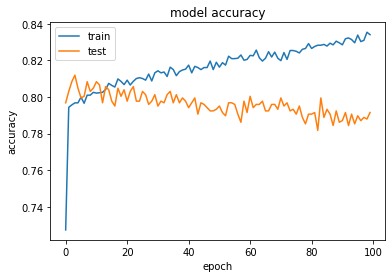

In [49]:
# summarize history for loss
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

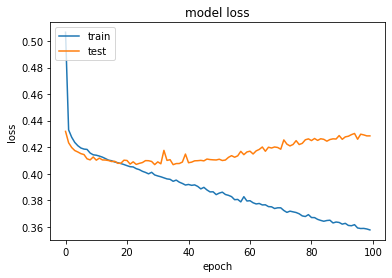

In [50]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.7942


[0.43930888175964355, 0.7941802740097046]

In [52]:
pred = model.predict(X_test)
pred[:5]

45/45 [==============================] - 0s 2ms/step


array([[0.65474164],
       [0.03234869],
       [0.00721492],
       [0.5888163 ],
       [0.00493242]], dtype=float32)

In [53]:
y_pred = []
for element in pred:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0) 

In [54]:
y_pred[:10]

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [55]:
y_test[:10]

185     1
2715    0
3825    0
1807    1
132     0
1263    1
3732    0
1672    0
811     1
2526    1
Name: Churn, dtype: int64

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

print(' Classification Report: \n\n', classification_report(y_test, y_pred))

 Classification Report: 

               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.53      0.58       373

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



Text(69.0, 0.5, 'Truth')

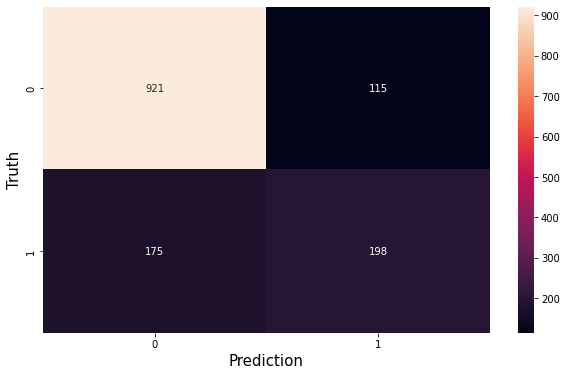

In [57]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction', fontsize=15)
plt.ylabel('Truth', fontsize=15)

**Accuracy**

In [58]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)*100
score

79.4180269694819

In [66]:
round((921+198)/(921+115+175+198),2)

0.79

**Precision for 0 class. i.e. Precision for customers who did not churn**

In [69]:
precision_0 = round(921/(921+175), 2)
precision_0

0.84

**Precision for 1 class. i.e. Precision for customers who are churn**

In [70]:
precision_1 = round(198/(198+115),2)
precision_1

0.63

**Recall for 0 class**

In [71]:
recall_0 = round(921/(921+115),2)
recall_0

0.89

**Recall for 1 class**

In [72]:
recall_1 = round(198/(198+175),2)
recall_1

0.53

**F1-score for 0 class**

In [73]:
f1_score_0 = round((2*precision_0*recall_0)/(precision_0+recall_0), 2)
f1_score_0

0.86

**F1-score for 1 class**

In [74]:
f1_score_1 = round((2*precision_1*recall_1)/(precision_1+recall_1), 2)
f1_score_1

0.58

# SMOTE

Improve f1-score useing SMOTE Technique 

In [151]:
X = customer_churn_df.drop('Churn',axis='columns')
y = customer_churn_df['Churn']

In [152]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

In [154]:
X_train.shape, X_test.shape

((8278, 23), (2070, 23))

In [155]:
# Number of classes in training Data
y_train.value_counts()

1    4139
0    4139
Name: Churn, dtype: int64

In [160]:
def ANN_smote(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_shape=(23,), activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [161]:
y_preds = ANN_smote(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5231 - accuracy: 0.7422
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4606 - accuracy: 0.7828
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4508 - accuracy: 0.7873
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4455 - accuracy: 0.7875
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4414 - accuracy: 0.7913
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4389 - accuracy: 0.7887
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4364 - accuracy: 0.7927
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4345 - accuracy: 0.7937
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4324 - accuracy: 0.7981
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4314 - accura

SMOT Oversampling increases f1 score of minority class 1 from **0.58 to 0.82** (huge improvement) Also over all accuracy improves from **0.79 to 0.82**